<a href="https://colab.research.google.com/github/arpitarumma/BusinessIntelligenceConcept/blob/main/BI_mini_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTING THE LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
#MOUNTING FROM GOOGLE DRIVE
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#READING THE DATASET
df=pd.read_csv("/content/gdrive/MyDrive/E-commerce Customer Behavior - Sheet1.csv")
df

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
...,...,...,...,...,...,...,...,...,...,...,...
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral


In [ ]:
#INFO OF THE DATASET
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [ ]:
#DROP DUPLICATE VALUES
df = df.drop_duplicates(keep='first')

In [ ]:
# Convert categorical columns to one-hot encoding
df['Discount Applied'] = df['Discount Applied'].astype(str)  # Convert boolean to string for one-hot encoding
df_onehot = pd.get_dummies(df[['Membership Type', 'Discount Applied', 'Satisfaction Level']])

# Concatenate one-hot encoded columns with numerical columns (like 'Items Purchased')
data_cluster = pd.concat([df_onehot, df[['Items Purchased']]], axis=1)


In [ ]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cluster)


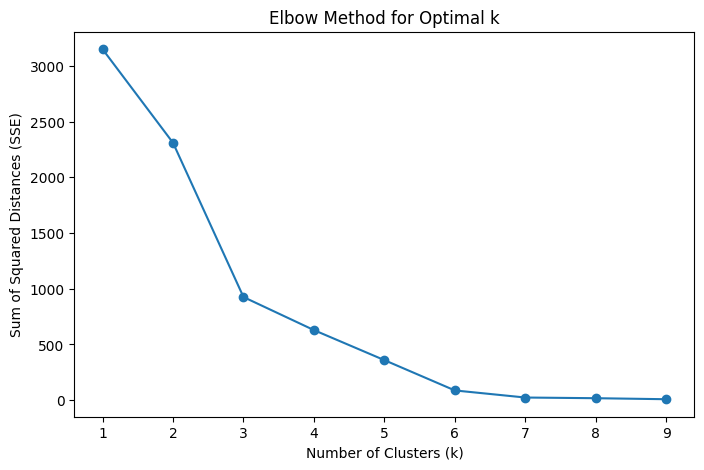

In [ ]:
# Calculate the sum of squared distances for different values of k
sse = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
# Assuming the optimal number of clusters is 3
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(data_scaled)

# Add the cluster labels to the original data
df['Cluster'] = clusters


In [ ]:
# Calculate the average values for each feature in each cluster
# Exclude non-numeric columns from the mean calculation
cluster_analysis = df.groupby('Cluster').agg({col: 'mean' for col in df.select_dtypes(include=['number']).columns})
print(cluster_analysis)

         Customer ID        Age  Total Spend  Items Purchased  Average Rating  \
Cluster                                                                         
0         270.720000  30.120000  1280.319200        17.320000        4.646400   
1         280.596330  35.577982   612.916514         9.394495        3.647706   
2         275.862069  35.482759   595.136207        10.525862        3.692241   

         Days Since Last Purchase  Cluster  
Cluster                                     
0                       17.696000      0.0  
1                       19.339450      1.0  
2                       42.982759      2.0  


In [ ]:
# Get cluster centroids
   centroids = kmeans.cluster_centers_
   centroids_pca = pca.transform(centroids)

   # Plot clusters with centroids
   plt.figure(figsize=(10, 7))
   sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set1')
   plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker='X', s=200, c='black', label='Centroids')
   plt.title('Customer Clusters Based on Behavior Patterns')
   plt.legend()
   plt.show()

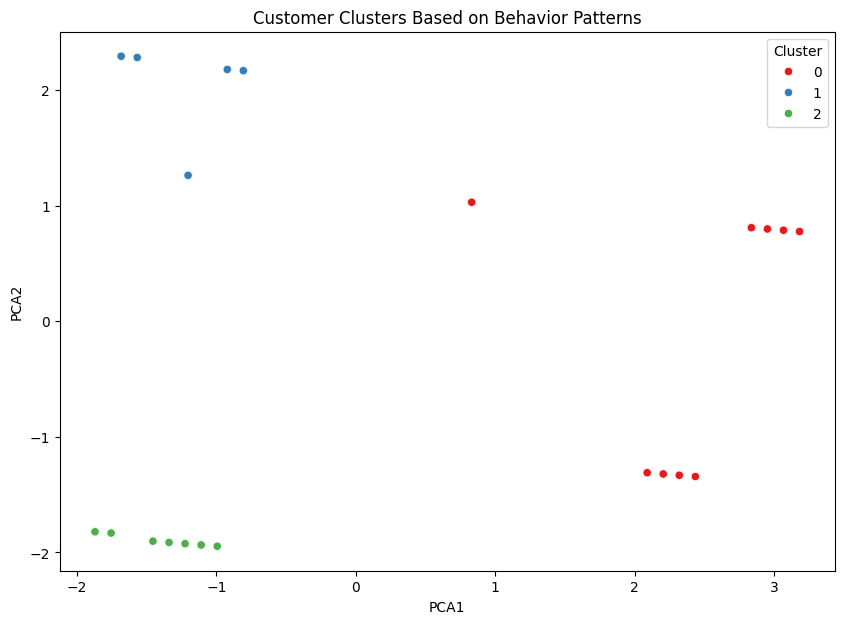

In [ ]:
# Plot clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)
df['PCA1'] = data_pca[:, 0]
df['PCA2'] = data_pca[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Clusters Based on Behavior Patterns')
plt.show()


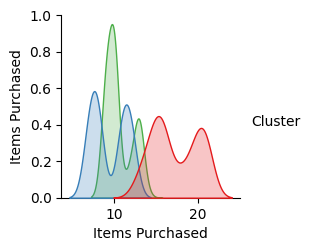

In [ ]:
sns.pairplot(df[['Items Purchased', 'Discount Applied', 'Satisfaction Level', 'Cluster']], hue='Cluster', palette='Set1')
plt.show()

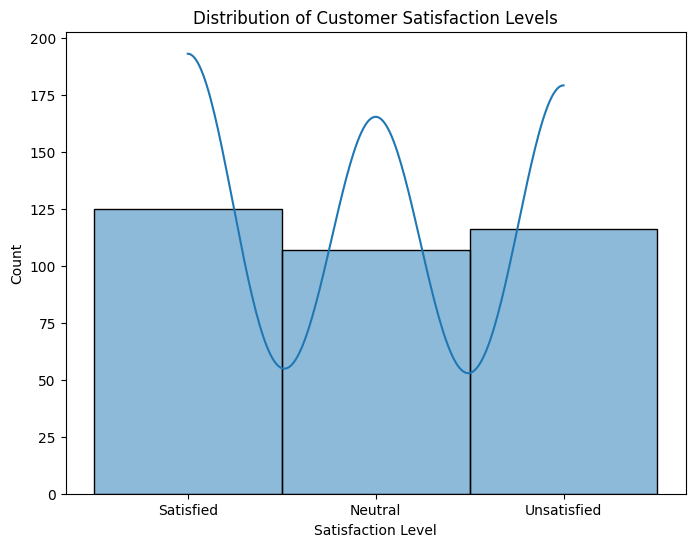

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['Satisfaction Level'], bins=10, kde=True)  # kde adds a density curve
plt.title('Distribution of Customer Satisfaction Levels')
plt.xlabel('Satisfaction Level')
plt.ylabel('Count')
plt.show()

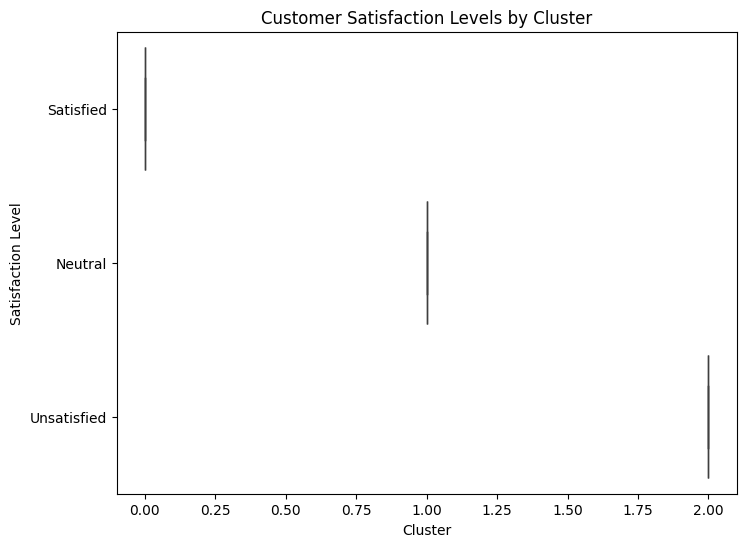

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster', y='Satisfaction Level', data=df)
plt.title('Customer Satisfaction Levels by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Satisfaction Level')
plt.show()

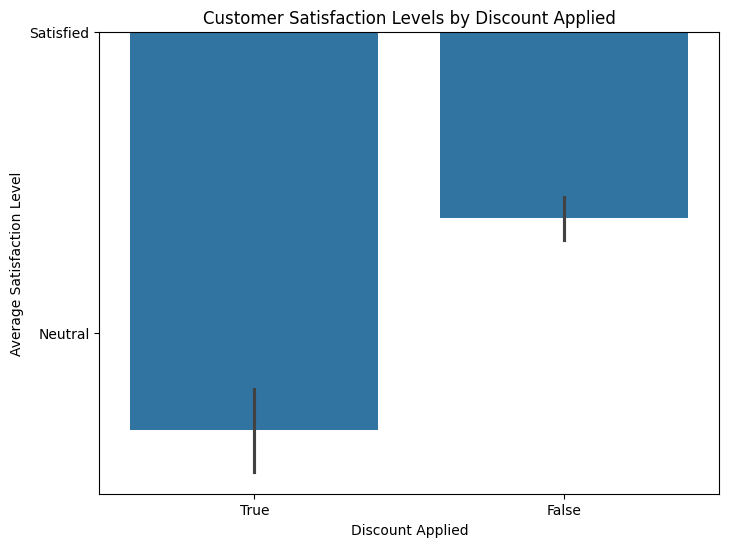

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Discount Applied', y='Satisfaction Level', data=df)
plt.title('Customer Satisfaction Levels by Discount Applied')
plt.xlabel('Discount Applied')
plt.ylabel('Average Satisfaction Level')
plt.show()